### AIM: compare r-band PSFs // W3 images from SGA2020 (VFS) and SGA2025 data products

In [16]:
from photutils.aperture import CircularAperture, ApertureStats
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import os
homedir=os.getenv("HOME")

#### r-band PSF comparison
- jm = SGA2025  |||  vfs = SGA2020

In [17]:
jm=fits.getdata(homedir+'/SGA2025_23490p5933-psf-r.fits.fz')
vfs=fits.getdata(homedir+'/NGC5985-custom-psf-r.fits')

In [18]:
jm_norm = (jm - np.min(jm)) / (np.max(jm) - np.min(jm))
vfs_norm = (vfs - np.min(vfs)) / (np.max(vfs) - np.min(vfs))
out=(jm_norm - vfs_norm)

/var/folders/gx/q5wqxlgs0rgfm6f87vgxlgyw4s52w0/T/ipykernel_10033/2396264132.py:2: RuntimeWarning: divide by zero encountered in log10
  im1=ax1.imshow(np.log10(vfs_norm),origin='lower')
/var/folders/gx/q5wqxlgs0rgfm6f87vgxlgyw4s52w0/T/ipykernel_10033/2396264132.py:4: RuntimeWarning: divide by zero encountered in log10
  im2=ax2.imshow(np.log10(jm_norm),origin='lower')
/var/folders/gx/q5wqxlgs0rgfm6f87vgxlgyw4s52w0/T/ipykernel_10033/2396264132.py:6: RuntimeWarning: divide by zero encountered in log10
  im3=ax3.imshow(np.log10(out),origin='lower')
/var/folders/gx/q5wqxlgs0rgfm6f87vgxlgyw4s52w0/T/ipykernel_10033/2396264132.py:6: RuntimeWarning: invalid value encountered in log10
  im3=ax3.imshow(np.log10(out),origin='lower')


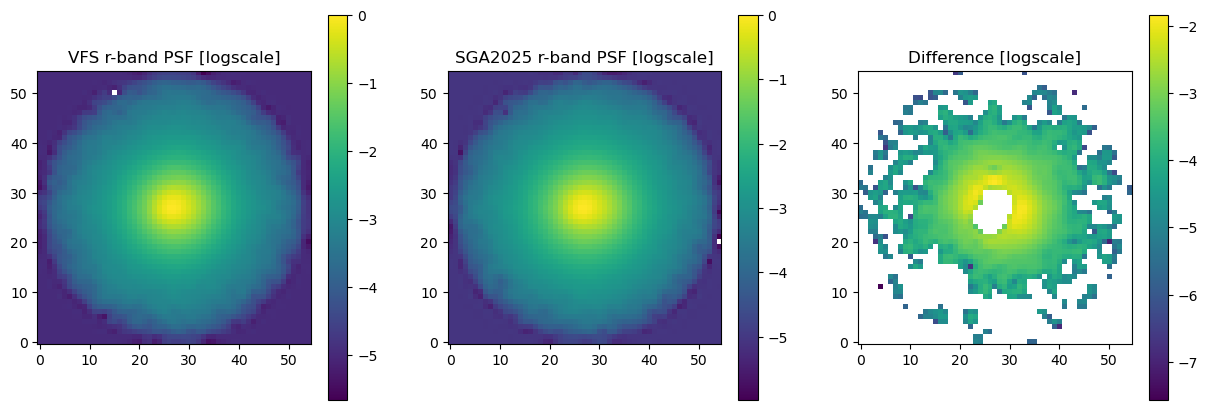

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
im1=ax1.imshow(np.log10(vfs_norm),origin='lower')
ax1.set_title('VFS r-band PSF [logscale]')
im2=ax2.imshow(np.log10(jm_norm),origin='lower')
ax2.set_title('SGA2025 r-band PSF [logscale]')
im3=ax3.imshow(np.log10(out),origin='lower')
ax3.set_title('Difference [logscale]')

fig.colorbar(im1,ax=ax1)
fig.colorbar(im2,ax=ax2)
fig.colorbar(im3,ax=ax3)

plt.show()

---

#### r-band image comparison (I)
- checking background pixel counts in a relatively secluded region of the image sky
- note that both images are different sizes

In [64]:
rband_sga, hdu_sga = fits.getdata(homedir+'/galfit_wisesize_testing/SGA2025_J098.1965+63.6736-r.fits',header=True)
rband_vfs, hdu_vfs = fits.getdata(homedir+'/NGC5985-custom-image-r.fits',header=True)

The mean pixel value inside the aperture is: 0.0001
The median pixel value inside the aperture is: -0.0003


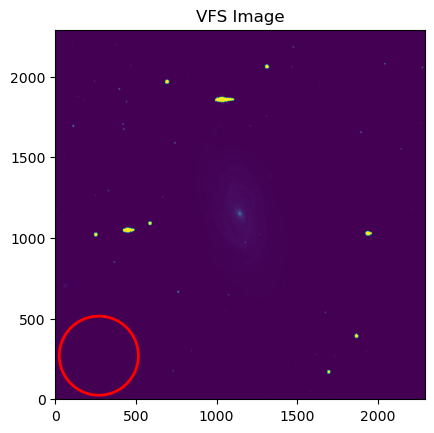

In [74]:
position = (269.8,269.8)  # (x, y) coordinates
radius = 245
aperture = CircularAperture(position, r=radius)

#calculate statistics using ApertureStats
aperstats = ApertureStats(rband_vfs, aperture)
mean_pixel_value = aperstats.mean
median_pixel_value = aperstats.median

print(f"The mean pixel value inside the aperture is: {mean_pixel_value:.4f}")
print(f"The median pixel value inside the aperture is: {median_pixel_value:.4f}")

#visualize the aperture on the data
fig, ax = plt.subplots(1, 1)
ax.imshow(rband_vfs, origin='lower', cmap='viridis')
aperture.plot(ax=ax, color='red', lw=2)
plt.title(f"VFS Image")
plt.show()

The mean pixel value inside the aperture is: 0.0003
The median pixel value inside the aperture is: 0.0000


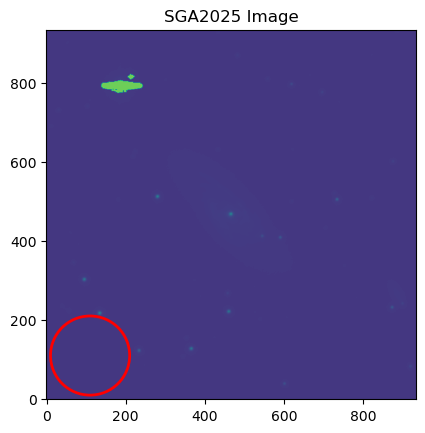

In [76]:
position = (110,110)  # (x, y) coordinates
radius = 100
aperture = CircularAperture(position, r=radius)

#calculate statistics using ApertureStats
aperstats = ApertureStats(rband_sga, aperture)
mean_pixel_value = aperstats.mean
median_pixel_value = aperstats.median

print(f"The mean pixel value inside the aperture is: {mean_pixel_value:.4f}")
print(f"The median pixel value inside the aperture is: {median_pixel_value:.4f}")

#visualize the aperture on the data
fig, ax = plt.subplots(1, 1)
ax.imshow(rband_sga, origin='lower', cmap='viridis')
aperture.plot(ax=ax, color='red', lw=2)
plt.title(f"SGA2025 Image")
plt.show()

#### r-band image comparison (II)
- trimming SGA2020 image to same image dimensions as SGA2025 image with the same center
- after subtracting the images, re-calculating the background pixel counts

In [66]:
wcs = WCS(hdu_vfs)

center_position = (rband_vfs.shape[1] // 2, rband_vfs.shape[0] // 2)
cutout_shape = (rband_sga.shape[1], rband_sga.shape[0])

cutout = Cutout2D(rband_vfs, position=center_position, size=cutout_shape, wcs=wcs)

cutout_data = cutout.data

The mean pixel value inside the aperture is: 0.0002
The median pixel value inside the aperture is: 0.0004


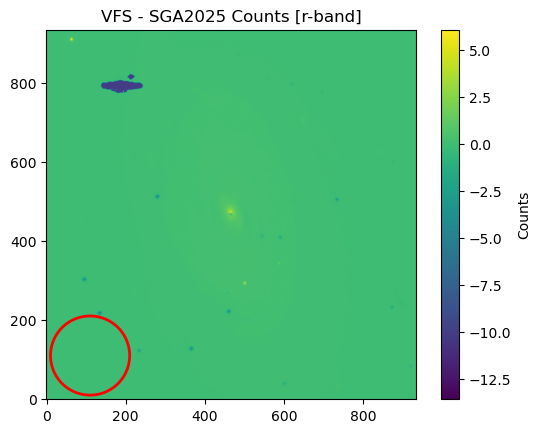

In [67]:
fig, ax = plt.subplots(1, 1)

diff_im = cutout_data - rband_sga

im=ax.imshow(diff_im, origin='lower')
plt.title('VFS - SGA2025 Counts [r-band]')
fig.colorbar(im, ax=ax, label='Counts')

aperture.plot(ax=ax, color='red', lw=2)

aperstats = ApertureStats(diff_im, aperture)
mean_pixel_value = aperstats.mean
median_pixel_value = aperstats.median

print(f"The mean pixel value inside the aperture is: {mean_pixel_value:.4f}")
print(f"The median pixel value inside the aperture is: {median_pixel_value:.4f}")

#### W3 image comparison (I)
- checking background pixel counts in a relatively secluded region of the image sky
- note that both images are different sizes

In [55]:
data_vfs,hdu1=fits.getdata(homedir+'/NGC5985-custom-image-W3.fits',header=True)

The mean pixel value inside the aperture is: -28.8274
The median pixel value inside the aperture is: -35.0269


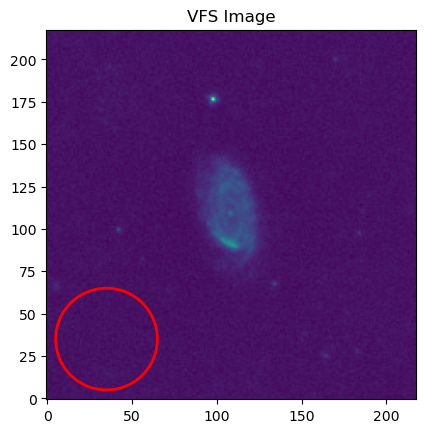

In [56]:
position = (35,35)  # (x, y) coordinates
radius = 30
aperture = CircularAperture(position, r=radius)

#calculate statistics using ApertureStats
aperstats = ApertureStats(data_vfs, aperture)
mean_pixel_value = aperstats.mean
median_pixel_value = aperstats.median

print(f"The mean pixel value inside the aperture is: {mean_pixel_value:.4f}")
print(f"The median pixel value inside the aperture is: {median_pixel_value:.4f}")

#visualize the aperture on the data
fig, ax = plt.subplots(1, 1)
ax.imshow(data_vfs, origin='lower', cmap='viridis')
aperture.plot(ax=ax, color='red', lw=2)
plt.title(f"VFS Image")
plt.show()

In [57]:
data_jm,hdu2=fits.getdata(homedir+'/Desktop/SGA2025-forkim/dr9-north/234/23490p5933/SGA2025_23490p5933-image-W3.fits.fz',header=True)

The mean pixel value inside the aperture is: -71.7315
The median pixel value inside the aperture is: -72.7941


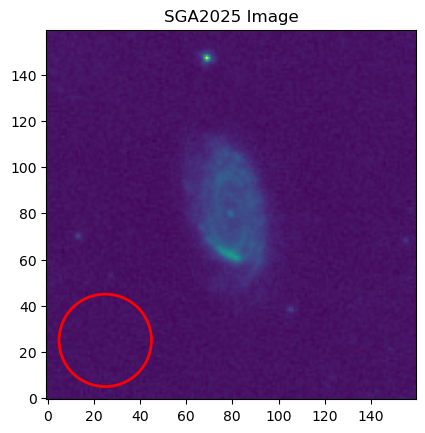

In [58]:
position = (25,25)  # (x, y) coordinates
radius = 20
aperture = CircularAperture(position, r=radius)

#calculate statistics using ApertureStats
aperstats = ApertureStats(data_jm, aperture)
mean_pixel_value = aperstats.mean
median_pixel_value = aperstats.median

print(f"The mean pixel value inside the aperture is: {mean_pixel_value:.4f}")
print(f"The median pixel value inside the aperture is: {median_pixel_value:.4f}")

# Optional: Visualize the aperture on the data
fig, ax = plt.subplots(1, 1)
ax.imshow(data_jm, origin='lower', cmap='viridis')
aperture.plot(ax=ax, color='red', lw=2)
plt.title(f"SGA2025 Image")
plt.show()

---

#### W3 image comparison (II)
- trimming SGA2020 image to same image dimensions as SGA2025 image with the same center
- after subtracting the images, re-calculating the background pixel counts

In [59]:
data_jm,hdu2=fits.getdata(homedir+'/Desktop/SGA2025-forkim/dr9-north/234/23490p5933/'+ \
                          'SGA2025_23490p5933-image-W3.fits.fz',header=True)

hdu = fits.open(homedir+'/NGC5985-custom-image-W3.fits')[0]

data_vfs = hdu.data
header = hdu.header

wcs = WCS(header)

center_position = (data_vfs.shape[1] // 2, data_vfs.shape[0] // 2)
cutout_shape = (data_jm.shape[1], data_jm.shape[0])

cutout = Cutout2D(data_vfs, position=center_position, size=cutout_shape, wcs=wcs)

cutout_data = cutout.data

The mean pixel value inside the aperture is: 1.0589
The median pixel value inside the aperture is: 1.9867


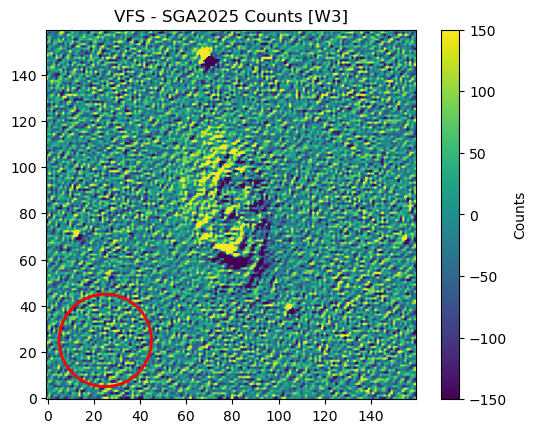

In [60]:
fig, ax = plt.subplots(1, 1)

diff_im = cutout_data - data_jm
#plt.imshow(np.log10(diff_im), origin='lower')
im=ax.imshow(diff_im, origin='lower', vmin=-150,vmax=150)
plt.title('VFS - SGA2025 Counts [W3]')
fig.colorbar(im, ax=ax, label='Counts')

aperture.plot(ax=ax, color='red', lw=2)

aperstats = ApertureStats(diff_im, aperture)
mean_pixel_value = aperstats.mean
median_pixel_value = aperstats.median

print(f"The mean pixel value inside the aperture is: {mean_pixel_value:.4f}")
print(f"The median pixel value inside the aperture is: {median_pixel_value:.4f}")

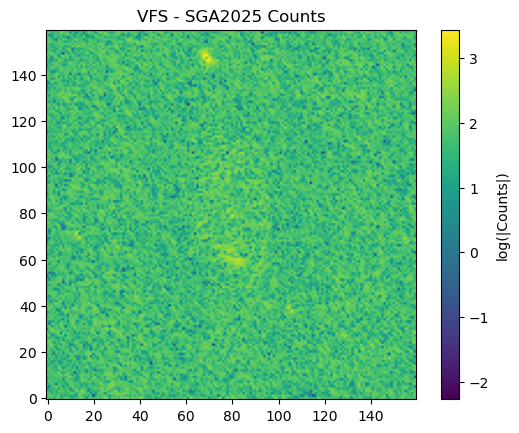

In [61]:
fig, ax = plt.subplots(1, 1)

diff_im = cutout_data - data_jm
#plt.imshow(np.log10(diff_im), origin='lower')
im=ax.imshow(np.log10(np.abs(diff_im)), origin='lower')
plt.title('VFS - SGA2025 Counts')
fig.colorbar(im, ax=ax, label='log(|Counts|)')
plt.show()